In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [19]:
# if necessary, download 'US' library dependency
#!pip install US
from clean_data import *


In [20]:
# Helper functions
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return model, summary

def plot_model(X, y, label='Residual Plot'):
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()

In [21]:
# Load in training data
df = pd.read_csv('data/Train.csv', low_memory=False)

In [22]:
# Clean the Data with Helper Script
#df_clean = 
clean_df = clean_df(df)

In [23]:
clean_df.head()

,SalePrice,datasource,YearMade,MachineHoursCurrentMeter,state,Ripper: None or Unspecified,Ripper: Yes,Ripper: Multi Shank,Ripper: Single Shank,ProductSize: Medium,...,ProductSize: Large,ProductSize: Compact,HorsePower,Vehicle Type: Track Excavators,Vehicle Type: Track Type Tractors,Vehicle Type: Backhoe Loaders,Vehicle Type: Wheel Loader,Vehicle Type: Skid Steer Loaders,Vehicle Type: Motor Graders,yearsold
0,66000,121,2004.0,68.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,120.000000,0.0,0.0,0.0,1.0,0.0,0.0,2006
1,57000,121,1996.0,4640.0,37,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,175.000000,0.0,0.0,0.0,1.0,0.0,0.0,2004
2,10000,121,2001.0,2838.0,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,165.216455,0.0,0.0,0.0,0.0,1.0,0.0,2004
3,38500,121,2001.0,3486.0,48,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,165.216455,1.0,0.0,0.0,0.0,0.0,0.0,2011
4,11000,121,2007.0,722.0,36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,165.216455,0.0,0.0,0.0,0.0,1.0,0.0,2009


In [24]:
# Split up Data Between Features (X) and SalePrice, i.e. the Target Values (y))
X = clean_df.drop(columns=['SalePrice'])
y = clean_df['SalePrice']

summary_model(X, y)

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa997cd2fd0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.572
 Model:                            OLS   Adj. R-squared:                  0.572
 Method:                 Least Squares   F-statistic:                 2.556e+04
 Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
 Time:                        22:13:09   Log-Likelihood:            -4.4281e+06
 No. Observations:              401125   AIC:                         8.856e+06
 Df Residuals:                  401103   BIC:                         8.856e+06
 Df Model:                          21                                         
 Covariance Type:            nonrobust                                         
                                         coef    std err          t

In [25]:
model, summary = summary_model(X, y)

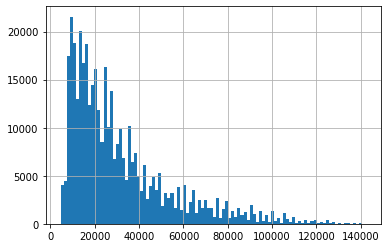

In [26]:
# Plotting the histogram for the Balance (y)
y.hist(bins=100)
plt.show()

In [27]:
def rmsle(actual, predictions):
    log_diff = np.log(predictions+1) - np.log(actual+1)
    return np.sqrt(np.mean(log_diff**2))

def rmse(actual, predictions):
    diff = predictions - actual
    return np.sqrt(np.mean(diff**2))

In [30]:
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True)
test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
X_array = np.array(X)
y_array = np.log(np.array(y))

for idx, (train, test) in enumerate(kf.split(X)):
    model = LinearRegression()
    model.fit(X_array[train], y_array[train])
    y_hat = model.predict(X_array[test])
    y_train = model.predict(X_array[train])
    
    train_cv_errors[idx] = rmsle(y_array[train], y_train)
    test_cv_errors[idx] = rmsle(y_array[test], y_hat)

train_cv_errors, test_cv_errors

(array([0.03681113, 0.03676828, 0.03682234, 0.03681786, 0.03676724,
        0.03680314, 0.03682065, 0.0368372 , 0.03679243, 0.0367921 ]),
 array([0.03673228, 0.03713358, 0.03661953, 0.03666285, 0.03713166,
        0.03680484, 0.03665091, 0.03649925, 0.03690903, 0.03691538]))